In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import math
import matplotlib.pyplot as plt
from typing import List, Tuple

1 Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241. 

In [2]:
# https://www.coursera.org/learn/vvedenie-mashinnoe-obuchenie/programming/uDU31/gradiientnyi-bustingh-nad-rieshaiushchimi-dieriev-iami

gbm_df = pd.read_csv('gbm-data.csv')
gbm_df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = gbm_df.loc[:, 'D1':'D1776'].values
y = gbm_df['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                      test_size=0.8, 
                                      random_state=241)

2 Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:

- Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.


- Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.

- Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

In [4]:
def sigmoid(y_pred: np.array):
    return 1.0 / (1.0 + np.exp(-y_pred))

def log_loss_results(model, X: np.array, y: np.array):
    return [log_loss(y, sigmoid(y_pred)) for y_pred in model.staged_decision_function(X)]

def plot_loss(learning_rate: float, test_loss: List[float], train_loss: List[float]):
    plt.plot(test_loss, 'r')
    plt.plot(train_loss, 'g')
    plt.legend(['test', 'train'])
    plt.show()

Learning rate: 1
      Iter       Train Loss   Remaining Time 
         1           1.0190           14.20s
         2           0.9192           14.39s
         3           0.8272           14.66s
         4           0.7834           15.14s
         5           0.7109           15.10s
         6           0.6368           14.94s
         7           0.5797           14.87s
         8           0.5610           14.98s
         9           0.5185           14.93s
        10           0.4984           15.06s
        20           0.1999           14.80s
        30           0.1313           14.41s
        40           0.0790           13.70s
        50           0.0511           13.12s
        60           0.0352           12.72s
        70           0.0245           12.07s
        80           0.0162           11.34s
        90           0.0114           10.66s
       100           0.0077            9.95s
       200           0.0002            3.30s


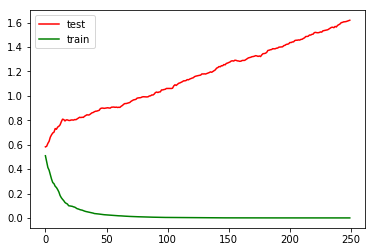

Min loss 0.58 with n_estimators=1

Learning rate: 0.5
      Iter       Train Loss   Remaining Time 
         1           1.1255           15.50s
         2           1.0035           14.79s
         3           0.9386           14.76s
         4           0.8844           14.91s
         5           0.8381           14.82s
         6           0.7995           14.82s
         7           0.7559           15.01s
         8           0.7205           15.17s
         9           0.6958           15.49s
        10           0.6725           15.40s
        20           0.4672           15.09s
        30           0.3179           14.36s
        40           0.2274           13.56s
        50           0.1774           12.95s
        60           0.1394           12.38s
        70           0.1050           11.74s
        80           0.0805           11.02s
        90           0.0650           10.35s
       100           0.0511            9.70s
       200           0.0058            3.23s


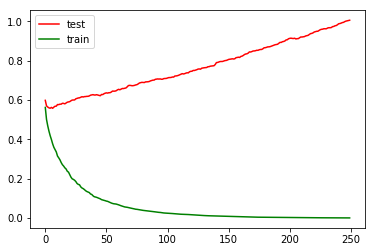

Min loss 0.56 with n_estimators=7

Learning rate: 0.3
      Iter       Train Loss   Remaining Time 
         1           1.2095           15.94s
         2           1.1006           15.01s
         3           1.0240           14.66s
         4           0.9729           14.65s
         5           0.9387           15.05s
         6           0.8948           14.85s
         7           0.8621           14.76s
         8           0.8360           14.89s
         9           0.8171           14.85s
        10           0.7883           14.89s
        20           0.6029           14.34s
        30           0.4760           13.88s
        40           0.3879           13.44s
        50           0.3325           12.83s
        60           0.2759           12.27s
        70           0.2304           11.62s
        80           0.1969           10.98s
        90           0.1718           10.34s
       100           0.1404            9.70s
       200           0.0358            3.25s


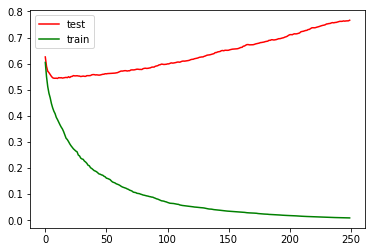

Min loss 0.54 with n_estimators=11

Learning rate: 0.2
      Iter       Train Loss   Remaining Time 
         1           1.2613           15.70s
         2           1.1715           15.01s
         3           1.1009           15.08s
         4           1.0529           15.02s
         5           1.0130           14.76s
         6           0.9740           14.94s
         7           0.9475           15.35s
         8           0.9197           15.20s
         9           0.8979           15.14s
        10           0.8730           14.94s
        20           0.7207           14.73s
        30           0.6055           14.09s
        40           0.5244           13.55s
        50           0.4501           12.82s
        60           0.3908           12.22s
        70           0.3372           11.59s
        80           0.3009           10.96s
        90           0.2603           10.28s
       100           0.2327            9.62s
       200           0.0835            3.24s

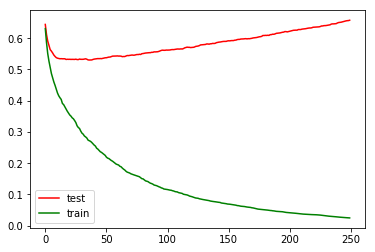

Min loss 0.53 with n_estimators=37

Learning rate: 0.1
      Iter       Train Loss   Remaining Time 
         1           1.3199           16.20s
         2           1.2645           15.26s
         3           1.2170           14.83s
         4           1.1775           14.96s
         5           1.1404           14.66s
         6           1.1106           15.02s
         7           1.0844           14.90s
         8           1.0617           15.04s
         9           1.0411           14.82s
        10           1.0223           14.65s
        20           0.8864           14.67s
        30           0.7844           14.14s
        40           0.7176           13.54s
        50           0.6590           13.01s
        60           0.6120           12.37s
        70           0.5599           11.69s
        80           0.5242           11.07s
        90           0.4829           10.40s
       100           0.4473            9.76s
       200           0.2379            3.26s

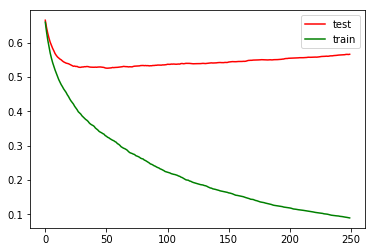

Min loss 0.53 with n_estimators=52



In [5]:
min_loss_results = {}
for lr in [1, 0.5, 0.3, 0.2, 0.1]:
    print(f'Learning rate: {lr}')

    gbc = GradientBoostingClassifier(learning_rate=lr, n_estimators=250, verbose=True, random_state=241)
    gbc.fit(X_train, y_train)
    
    train_loss = log_loss_results(gbc, X_train, y_train)
    test_loss = log_loss_results(gbc, X_test, y_test)
    plot_loss(lr, test_loss, train_loss)
    
    min_loss_value = min(test_loss)
    min_loss_index = test_loss.index(min_loss_value) + 1
    min_loss_results[lr] = min_loss_value, min_loss_index

    print(f'Min loss {min_loss_value:.2f} with n_estimators={min_loss_index}\n')

На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. 

Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [6]:
rfc = RandomForestClassifier(n_estimators=min_loss_index, random_state=241)
rfc.fit(X_train, y_train)

y_pred = rfc.predict_proba(X_test)[:, 1]
test_loss = log_loss(y_test, y_pred)

print(f'{test_loss:.2f}')

0.54
